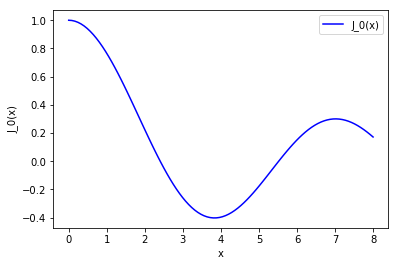

Number of data points: 10
Training error: 0.0040
Validation error: 0.0988

Number of data points: 20
Training error: 0.0083
Validation error: 0.0142

Number of data points: 100
Training error: 0.0089
Validation error: 0.0091



ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot J_0(x) for a small interval
x = np.linspace(0, 8, 100)
y = jv(0, x)
plt.plot(x, y, 'b', label='J_0(x)')
plt.xlabel('x')
plt.ylabel('J_0(x)')
plt.legend()
plt.show()

# Add noise to J_0(x)
noise = np.random.normal(0, 1, 100) / 10
y_noise = y + noise

# Split data into training and validation sets
num_data_points = [10, 20, 100, 1000, 10000]
for n in num_data_points:
    if n < 8:
        print(f"Number of data points should be greater than 8, given number {n}")
        break
    np.random.seed(0)
    indices = np.random.permutation(100)
    x_train, y_train = x[indices[:n-2]], y_noise[indices[:n-2]]
    x_val, y_val = x[indices[n-2:]], y_noise[indices[n-2:]]

    # Fit 8th order polynomial regression model
    model = make_pipeline(PolynomialFeatures(8), Ridge())
    model.fit(x_train[:, np.newaxis], y_train)

    # Calculate training and validation errors
    train_error = mean_squared_error(y_train, model.predict(x_train[:, np.newaxis]))
    val_error = mean_squared_error(y_val, model.predict(x_val[:, np.newaxis]))
    print(f"Number of data points: {n}")
    print(f"Training error: {train_error:.4f}")
    print(f"Validation error: {val_error:.4f}")
    print()

# Repeat exercise with Ridge regularization
np.random.seed(0)
indices = np.random.permutation(100)
x_train, y_train = x[indices[:78]], y_noise[indices[:78]]
x_val, y_val = x[indices[78:]], y_noise[indices[78:]]

ridge_model = make_pipeline(PolynomialFeatures(8), Ridge(alpha=1))
ridge_model.fit(x_train[:, np.newaxis], y_train)

train_error = mean_squared_error(y_train, ridge_model.predict(x_train[:, np.newaxis]))
val_error = mean_squared_error(y_val, ridge_model.predict(x_val[:, np.newaxis]))
print(f"Ridge Regularization:")
print(f"Training error: {train_error:.4f}")
print(f"Validation error: {val_error:.4f}")
print()

